# Building Good Training Sets-Data Preprocessing

## Dealing with missing data

### Identifying missing values in tabular data

In [1]:
#Creating simple example data
import pandas as pd
from io import StringIO #Read string assigned to csv_data into a pandas DataFrame
csv_data = ''' A, B, C, D
               1.0, 2.0, 3.0, 4.0
               5.0, 6.0,, 8.0
               10.0, 11.0, 12.0,'''
df = pd.read_csv(StringIO(csv_data))#Reading CSV-formatted data into pandas DataFrame via read_csv function
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [2]:
#For larger dataframe it is impossible to look the NaN value manually. So we can use isnull() method instead
df.isnull()

,A,B,C,D
0,False,False,False,False
1,False,False,True,False
2,False,False,False,True


In [3]:
df.isnull().sum() #Number of missing value per column

 A    0
 B    0
 C    1
 D    1
dtype: int64

In [4]:
df.values #Getting numpy values of DataFrame 

array([[ 1.,  2.,  3.,  4.],
       [ 5.,  6., nan,  8.],
       [10., 11., 12., nan]])

### Eliminating samples or features with missing values

In [5]:
df.dropna(axis = 0) #Removing the entire rows

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [6]:
df.dropna(axis = 1) #Removing the entire column

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [7]:
df.dropna(how = 'all') #Only drop rows where all columns are NaN

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [8]:
df.dropna(thresh = 4) #Drop rows that have less than 4 real values

,A,B,C,D
0,1.0,2.0,3.0,4.0


### Imputing missing values

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imr = SimpleImputer(missing_values = np.nan , strategy = 'mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

## Handling Categorical Data

### Creating example dataset

In [10]:
import pandas as pd
import numpy as np
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                  ['red', 'L', 13.5, 'class2'],
                  ['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Mapping ordinal features

In [11]:
size_mapping = {
                'XL':3,
                 'L':2,
                  'M':1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [12]:
#2.2.2Generation of strings from numbers
inv_size_mapping = {v:k for k, v in size_mapping.items()}
df['size'] = df['size'].map(inv_size_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


### Encoding class labels

In [13]:
import numpy as np
import pandas as pd
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [14]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [15]:
#2.3.2Inverse encoding class label
inv_class_mapping = {idx:label for label, idx in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [16]:
#Alternatively LabelEncoder can be implemented in scikit-learn
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [17]:
#Inverse LabelEncode 
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

### Performing one-hot encoding on nominal features

In [18]:
#transformation of nominal color column of datasets
X = df[['color' , 'size' , 'price']].values
color_le = LabelEncoder()
X[: , 0] = color_le.fit_transform(X[: , 0])
X

array([[1, 'M', 10.1],
       [2, 'L', 13.5],
       [0, 'XL', 15.3]], dtype=object)

In [19]:
#OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y = ohe.fit_transform(X).toarray()
print(y)

[[0. 1. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0. 1.]]


In [20]:
#Alternative methods using get_dummies process
pd.get_dummies(df[['price' , 'color', 'size']])

,price,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


## Partitioning a dataset into separate training and test sets

In [21]:
import pandas as pd
import numpy as np
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header = None)
df_wine.columns = ['Class label' , 'Alcohol' , 'Malic Acid' , 'Ash' , 'Alcalinity of Ash' , 'Magnesium' , 
                   'Total Phenols' , 'Falvanoids' , 'NonFalvanoid Phenols' , 'Proanthocyanins' , 'Color Intensity' , 'Hue' , 
                   'OD280/OD315 of diluted wines' , 'Proline']
print(np.unique(df_wine['Class label']))
df_wine

[1 2 3]


,Class label,Alcohol,Malic Acid,Ash,Alcalinity of Ash,Magnesium,Total Phenols,Falvanoids,NonFalvanoid Phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [22]:
#Dividing data into training and test set
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0, stratify = y)

## Feature Scaling

### Normalization

In [23]:
#Normalization
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

### Standardization

In [24]:
#Standardization
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

### Manual implementation of Normalization and Standardization

In [25]:
ex = np.array([0.0 , 1.0 , 2.0 , 3.0 , 4.0 , 5.0])
print('Normalization:' , (ex-ex.min())/(ex.max()-ex.min()))
print('Standardization:' , (ex-ex.mean())/ex.std() )

Normalization: [0.  0.2 0.4 0.6 0.8 1. ]
Standardization: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]


In [26]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_std , y_train)
print('Training accuracy:' , lr.score(X_train_std , y_train))
print('Testing accuracy:' , lr.score(X_test_std , y_test))

Training accuracy: 1.0
Testing accuracy: 1.0


In [27]:
lr.intercept_

array([ 0.36864899,  0.78042576, -1.14907476])

In [28]:
lr.coef_

array([[ 0.78792017,  0.24090991,  0.44731358, -0.73488507,  0.11131899,
         0.22607309,  0.60649143, -0.14846826,  0.2412906 ,  0.14146002,
         0.1067172 ,  0.58063797,  0.98241228],
       [-0.95394452, -0.43669598, -0.7679318 ,  0.50645904, -0.17622726,
         0.07109671,  0.38810168,  0.09342089,  0.11351155, -0.91231504,
         0.61090074,  0.16781098, -1.09996903],
       [ 0.16602435,  0.19578606,  0.32061822,  0.22842603,  0.06490827,
        -0.2971698 , -0.99459311,  0.05504737, -0.35480216,  0.77085502,
        -0.71761794, -0.74844895,  0.11755675]])

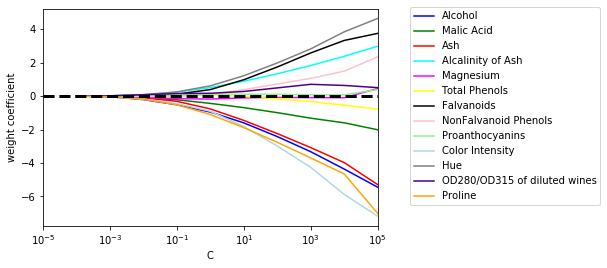

In [29]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']
weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l2',C=10.**c,random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)
weights = np.array(weights)
for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column], 
    label=df_wine.columns[column + 1],
    color=color)
plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center',bbox_to_anchor=(1.38, 1.03),ncol=1, fancybox=True)
plt.show()

In [30]:
X_train.shape[1]

13

## Sequential feature selection algorithm

In [31]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class SBS():
    def __init__(self , estimator , k_features , scoring = accuracy_score , random_state = 1 , test_size = 0.25):
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.scoring = scoring
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self , X , y):
        X_train , X_test , y_train , y_test = train_test_split(X , y , test_size= self.test_size , 
                                                               random_state = self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train , y_train , X_test , y_test , self.indices_)
        self.scores_ = [score]
        while dim>self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_ , r = dim-1):
                score = self._calc_score(X_train , y_train , X_test , y_test , p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):        
        return X[:, self.indices_]
    
    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)        
        return score

In [32]:
#Implementation of SBS using KNN classifier
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train_std, y_train) 

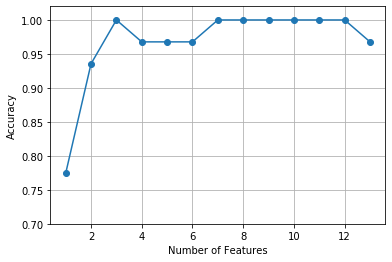

In [33]:
#classification accuracy of KNN classifier
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat , sbs.scores_ , marker = 'o')
plt.ylim([0.7 , 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.grid()
plt.show()

In [34]:
#smallest feature subsets for k = 3
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])


Index(['Alcohol', 'Malic Acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [35]:
knn.fit(X_train_std, y_train)
print('Training accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))

Training accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [36]:
knn.fit(X_train_std[:, k3], y_train)
print('Training accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Training accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


In [37]:
import numpy as np
import matplotlib.pyplot as plt

## Assessing feature importance with random forests

 1) Proline                        0.185453 
 2) Falvanoids                     0.174751 
 3) Color Intensity                0.143920 
 4) OD280/OD315 of diluted wines   0.136162 
 5) Alcohol                        0.118529 
 6) Hue                            0.058739 
 7) Total Phenols                  0.050872 
 8) Magnesium                      0.031357 
 9) Malic Acid                     0.025648 
10) Proanthocyanins                0.025570 
11) Alcalinity of Ash              0.022366 
12) NonFalvanoid Phenols           0.013354 
13) Ash                            0.013279 


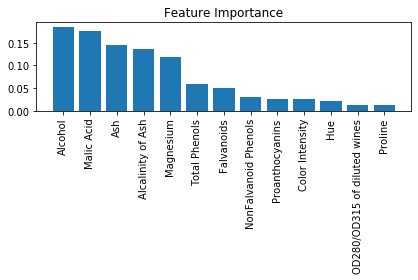

In [38]:
#Accessing feature importance with random forest
from sklearn.ensemble import RandomForestClassifier
feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 500, random_state = 1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f " %(f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices] , align = 'center' )
plt.xticks(range(X_train.shape[1]) , feat_labels , rotation = 90)
plt.xlim([-1 , X_train.shape[1]])
plt.tight_layout()
plt.show()


In [39]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_selected = sfm.transform(X_train)
print('Number of samples that meet this criterion:', X_selected.shape[0])
for f in range(X_selected.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

Number of samples that meet this criterion: 124
 1) Proline                        0.185453
 2) Falvanoids                     0.174751
 3) Color Intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529


In [40]:
X_train.shape[1]

13

In [41]:
feat_labels

Index(['Alcohol', 'Malic Acid', 'Ash', 'Alcalinity of Ash', 'Magnesium',
       'Total Phenols', 'Falvanoids', 'NonFalvanoid Phenols',
       'Proanthocyanins', 'Color Intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [42]:
np.argsort(importances)[::-1]

array([12,  6,  9, 11,  0, 10,  5,  4,  1,  8,  3,  7,  2], dtype=int64)

In [43]:
print("%2d) %-*s %f " %(0 + 1, 30, feat_labels[indices[0]], importances[indices[0]]))

 1) Proline                        0.185453 


In [44]:
indices[0]

12

In [45]:
feat_labels[indices[0]]

'Proline'

([<matplotlib.axis.XTick at 0x2ae2fd8f108>,
 <a list of 13 Text xticklabel objects>)

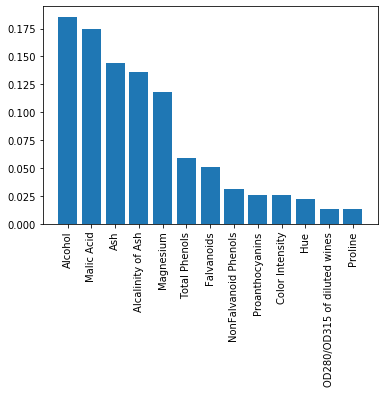

In [46]:
plt.bar(range(X_train.shape[1]), importances[indices] , align = 'center' )
plt.xticks(range(X_train.shape[1]) , feat_labels, rotation = 90)